In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['figure.dpi'] = 160

In [2]:
indices = np.arange(2, 40+1)
data_random = np.load('data_random.npy')
data_stc = np.load('data_stc.npy')
data_lingo = np.load('data_lingo.npy')
data_kmeans_base = np.load('data_kmeans_base.npy')
data_kmeans_advanced = np.load('data_kmeans_advanced.npy')
data_agglomerative_base = np.load('data_agglomerative_base.npy')
data_agglomerative_advanced = np.load('data_agglomerative_advanced.npy')

In [3]:
colors = {
        'True amount': '#000000',
        'Random': '#1f77b4',
        'STC': '#ff7f0e',
        'Lingo': '#2ca02c',
        'AC (advanced)': '#d62728',
        'AC (base)': '#9467bd',
        'KM (advanced)': '#8c564b',
        'KM (base)': '#e377c2'
    }

def glc(label):
    return {'label': label, 'color': colors[label]}

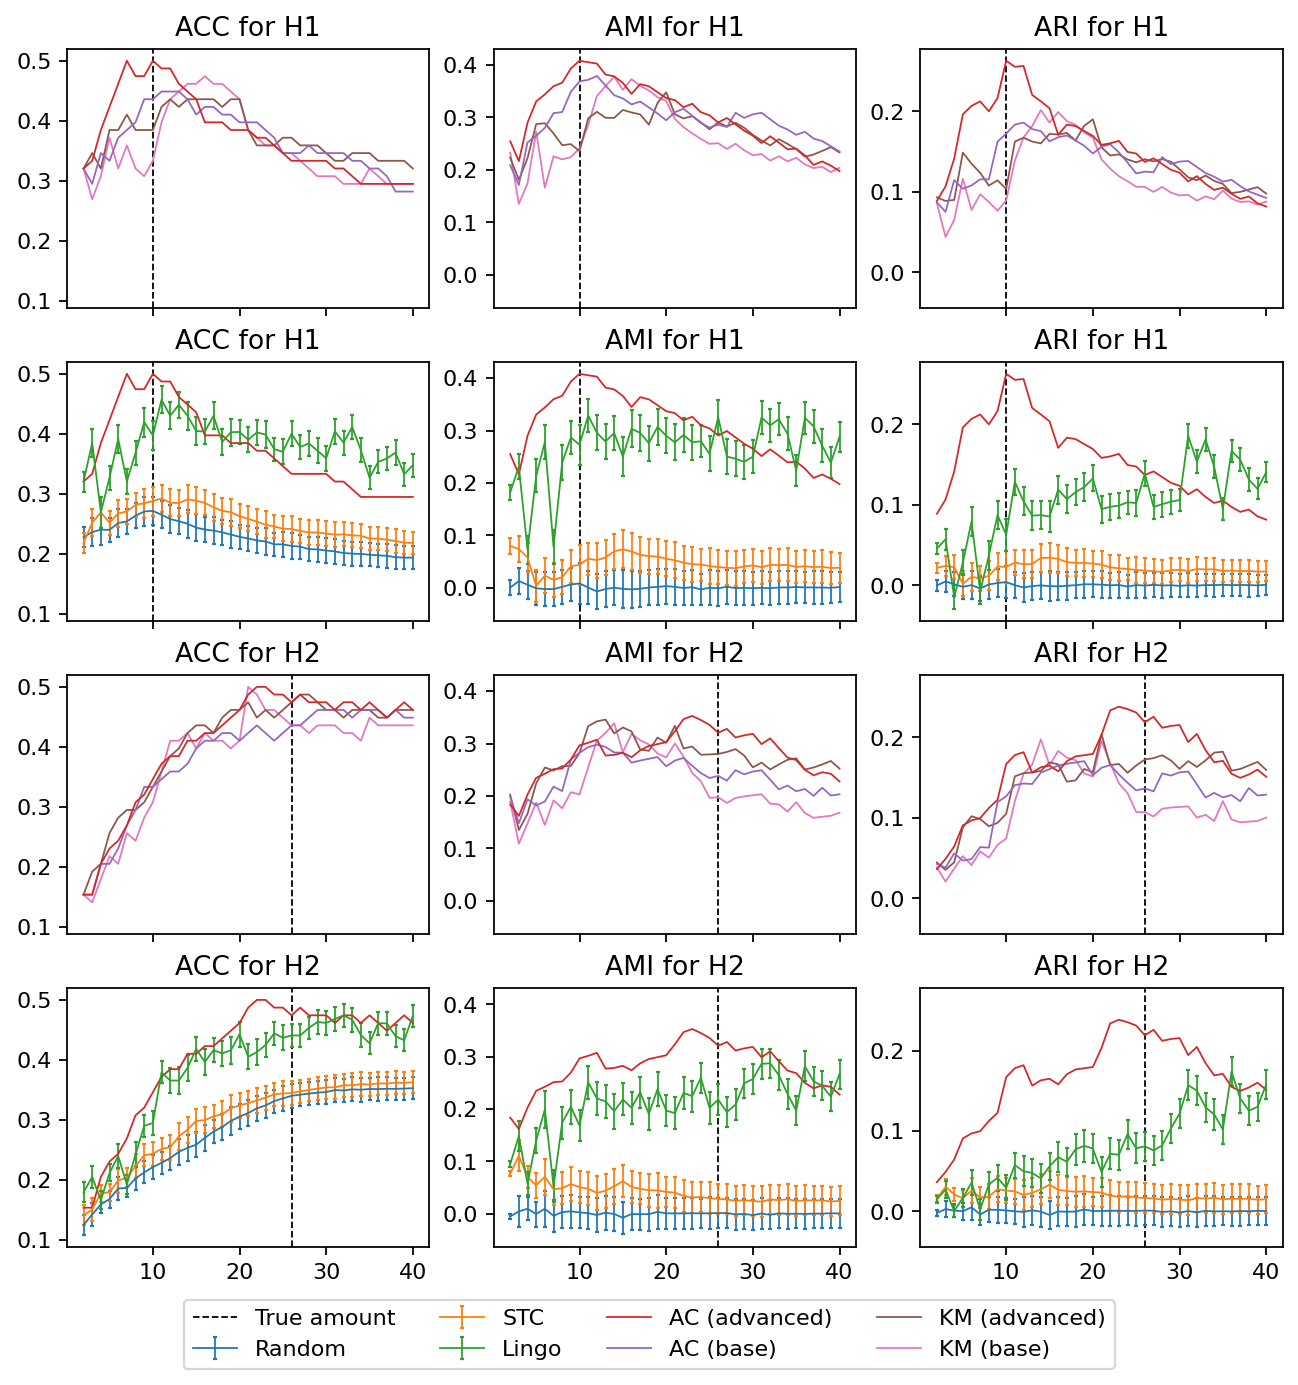

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8), sharex='all', sharey='col')
fig.set_layout_engine('constrained')

for i in range(6):
    ax = axs[(i % 2) * 2 + 1, i // 2]
    ax.axvline(x=10+i%2*16, linestyle='--', **glc('True amount'))
    for data, label in [(data_random, 'Random'), (data_stc, 'STC'), (data_lingo, 'Lingo')]:
        ax.errorbar(indices, data[:, i % 2, i // 2, 0], yerr=data_random[:, i % 2, i // 2, 1], capsize=1, **glc(label))
    ax.plot(indices, data_agglomerative_advanced[:, i % 2, i // 2, 0], **glc('AC (advanced)'))
    ax.set_title(['ACC', 'AMI', 'ARI'][i // 2]  + ' for ' + ['H1', 'H2'][i % 2])

    ax = axs[(i % 2) * 2, i // 2]
    ax.axvline(x=10+i%2*16, linestyle='--', **glc('True amount'))
    for data, label in [(data_kmeans_base, 'KM (base)'), (data_kmeans_advanced, 'KM (advanced)'),
                        (data_agglomerative_base, 'AC (base)'), (data_agglomerative_advanced, 'AC (advanced)')]:
        ax.plot(indices, data[:, i % 2, i // 2, 0], **glc(label))
    ax.set_title(['ACC', 'AMI', 'ARI'][i // 2] + ' for ' + ['H1', 'H2'][i % 2])

handles, labels = [], []
for ax_row in axs:
    for ax in ax_row:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

unique_handles_labels = dict(zip(labels, handles))

sorted_labels = list(colors.keys())
handles = [unique_handles_labels[label] for label in sorted_labels if label in unique_handles_labels]
labels = [label for label in sorted_labels if label in unique_handles_labels]

fig.legend(handles, labels, bbox_to_anchor=(0.5, 0), loc="upper center", ncol=4)
fig.show()